In [1]:
%matplotlib notebook

Similar to first figure, show examples of trajectories.

In [2]:
from pathlib import Path 
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

# Statistics:
from scipy import stats
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
fontprops = fm.FontProperties(size=18)

import statsmodels.api as sm

# Import shared_functions
import sys
import os
sys.path.insert(0, str(Path(os.getcwd()).parent))
import shared_functions

C:\Users\tadres\Miniconda3\envs\depol_block_publication\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
black_background = False # black background for slides
if black_background:
    plt.style.use('dark_background') 

In [4]:
root_path = Path('G:\\My Drive\\PhD\\Papers\\Vanishing spikes\\all_data\\Behavior\\EtB')
#savepath = Path('G:\\My Drive\\PhD\\Papers\\Vanishing spikes\\plots\\Fig2\\trajectories')
savepath = 'file path' # also change SAVE_PLOT variable in shared_functions.py
#savepath_for_stats = Path('G:\\Shared drives\\LouisLab COLLABORATIVE Vanishing Spikes\\stats_files')
savepath_for_stats = 'file path' # also change SAVE_PLOT variable in shared_functions.py

# Or42bSF, EtB 1:750

<IPython.core.display.Javascript object>


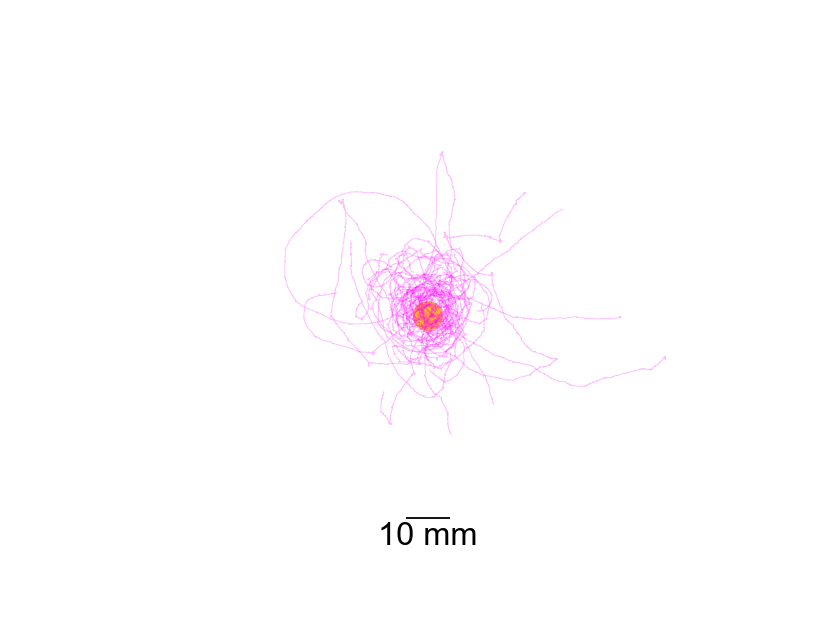

In [5]:

Or42bSF_EtB10mM_path = Path(root_path, 'EtB 10mM + VR\\no_Chrimson\\EtB only')

Or42bSF_EtB10mM_centroid, Or42bSF_EtB10mM_source, \
    Or42bSF_EtB10mM_dst, res, px_per_mm, Or42bSF_EtB10mM_fps = shared_functions.collect_data(Or42bSF_EtB10mM_path)

shared_functions.plot_trajectories(Or42bSF_EtB10mM_centroid, Or42bSF_EtB10mM_source, 
                                   'Fig3C_Or42bSF_EtB10mM.svg', 
                                   'magenta', res, px_per_mm, Or42bSF_EtB10mM_fps,
                                   take_time_end=None,
                                   black_background=black_background,
                                  savepath=savepath)

# Or42b>Chrimson, EtB 1:750

<IPython.core.display.Javascript object>


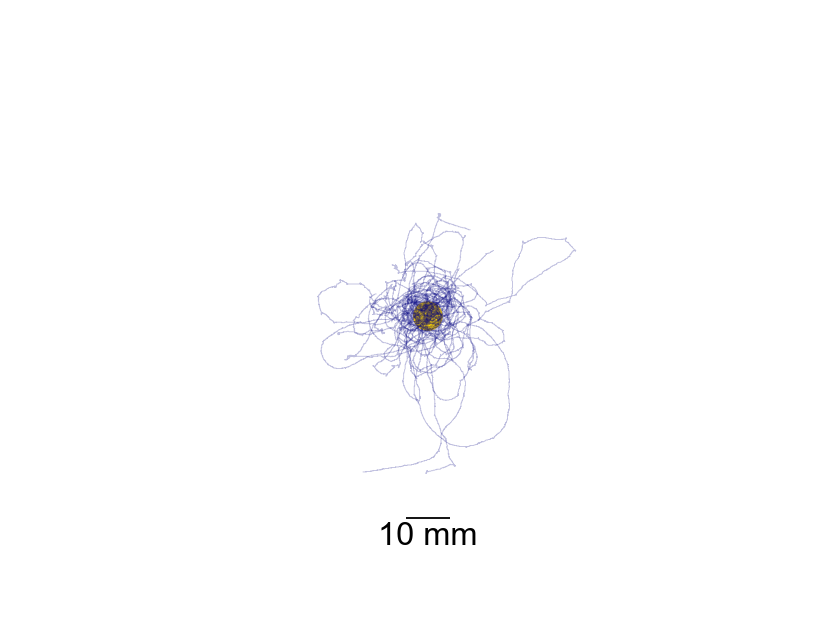

In [6]:
Or42bChrR_EtB10mM_path = Path(root_path, 'EtB 10mM + VR\\with_Chrimson\\EtB only')

Or42bChrR_EtB10mM_centroid, Or42bChrR_EtB10mM_source, \
    Or42bChrR_EtB10mM_dst, res, px_per_mm, Or42bChrR_EtB10mM_fps = shared_functions.collect_data(
    Or42bChrR_EtB10mM_path)

shared_functions.plot_trajectories(Or42bChrR_EtB10mM_centroid, Or42bChrR_EtB10mM_source, 
                                   'Fig3C_Or42bChR_EtB10mM.svg', 
                                   'navy', res, px_per_mm, Or42bChrR_EtB10mM_fps,
                                   take_time_end=None,
                                   black_background=black_background,
                                   savepath=savepath)

# Or42bSF, EtB 1:750 + VR

In [7]:
Or42bSF_EtB10mM_VR_path = Path(root_path, 'EtB 10mM + VR\\no_Chrimson\\EtB and VR')

Or42bSF_EtB10mM_VR_centroid, Or42bSF_EtB10mM_VR_source, \
    Or42bSF_EtB10mM_VR_dst, res, px_per_mm, Or42bSF_EtB10mM_VR_fps, all_arenas = shared_functions.collect_data(
    Or42bSF_EtB10mM_VR_path)

shared_functions.plot_trajectories(Or42bSF_EtB10mM_VR_centroid, Or42bSF_EtB10mM_VR_source, 
                                   'Fig3C_Or42bSF_EtB10mM_VR.svg', 
                                   'magenta', res, px_per_mm, Or42bSF_EtB10mM_VR_fps,
                                   take_time_end=None,
                                   black_background=black_background,
                                   all_arena=all_arenas,
                                   savepath=savepath)

<IPython.core.display.Javascript object>

# Or42b>ChrimsonR, EtB 1:750 + VR

In [8]:
Or42bChrR_EtB10mM_VR_path = Path(root_path, 'EtB 10mM + VR\\with_Chrimson\\EtB and VR')

Or42bChrR_EtB10mM_VR_centroid, Or42bChrR_EtB10mM_VR_source, \
    Or42bChrR_EtB10mM_VR_dst, res, px_per_mm, Or42bChrR_EtB10mM_VR_fps, all_arenas = shared_functions.collect_data(Or42bChrR_EtB10mM_VR_path)

shared_functions.plot_trajectories(Or42bChrR_EtB10mM_VR_centroid, Or42bChrR_EtB10mM_VR_source, 
                                   'Fig3C_Or42bChR_EtB10mM_VR.svg', 
                                   'navy', res, px_per_mm, Or42bChrR_EtB10mM_VR_fps,
                                   take_time_end=None,
                                   black_background=black_background,
                                   all_arena=all_arenas,
                                   savepath=savepath)

<IPython.core.display.Javascript object>

### Light intensity measurements

In 2020 I measured the light intensity of the 625 nM LED HP setup.

The maximum light intensity measured was 41 uW/mm2 as can be seen on pivr.org.

Light intensity increase is linear as we use PWM, hence I can calculate peak light intensity easily.

x * (41 uW/mm2/100), e.g. 50 % light intensity is 41/100*50=20.5

In [10]:
# Plot outline (in 2D) the VR arena for easier visualization
array_np = np.array(all_arenas[0])
# Convert PWM dutycycle to uW/mm2
array_np *= (41/100)
# (len(data_to_plot)*2.5,5)) # This should make the plot 
# size fit well with the boxplots below
fig = plt.figure(figsize = (2*2.5, 1))
ax = fig.add_subplot(111)
ax.plot(array_np[int(array_np.shape[0]/2),:], c='red')
#fig.savefig(Path(savepath, 'Fig3C_VR_outline.svg'))

<IPython.core.display.Javascript object>

In [14]:
all_p_values = [] # empty list for saving p-values for correction later

In [16]:
data_10mM_VR = [Or42bSF_EtB10mM_VR_dst,
                Or42bChrR_EtB10mM_VR_dst,
               ]
label_10mM_VR = ['Or42bSF_EtB1:750_VR_dst',
                 'Or42bChrR_EtB1:750_VR_dst',
                ]
colors = ['magenta',
          'navy',
         ]

shared_functions.doublecheck_fps(Or42bSF_EtB10mM_VR_fps)
shared_functions.doublecheck_fps(Or42bChrR_EtB10mM_VR_fps)
framerate = [20, 20]

df_for_stats_10mM_VR = shared_functions.plot_DST_boxplot(data_10mM_VR, label_10mM_VR, colors, framerate)

all_p_values.append(shared_functions.calc_stats(df_for_stats_10mM_VR, label_10mM_VR, parametric=False))

All files have 20.0 fps
All files have 20.0 fps


<IPython.core.display.Javascript object>

comparing Or42bSF_EtB1:750_VR_dst with Or42bChrR_EtB1:750_VR_dst
Or42bSF_EtB1:750_VR_dst
lilliefors(0.12365995189812806, 0.5411394888068606)


Or42bChrR_EtB1:750_VR_dst
lilliefors(0.2350534869496716, 0.0022713473149648736)


levene: LeveneResult(statistic=1.129482319209833, pvalue=0.2939584974241162)
ranksums test: RanksumsResult(statistic=-4.100211242012238, pvalue=4.127731852737723e-05)


All files have 20.0 fps
All files have 20.0 fps


<IPython.core.display.Javascript object>


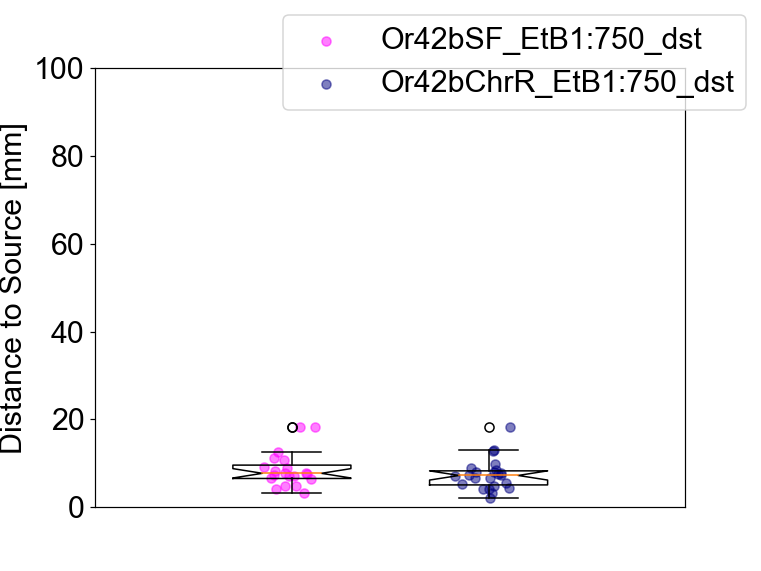

comparing Or42bSF_EtB1:750_dst with Or42bChrR_EtB1:750_dst
Or42bSF_EtB1:750_dst
lilliefors(0.19110297187997105, 0.05225192363866234)


Or42bChrR_EtB1:750_dst
lilliefors(0.17598460127879967, 0.06361476863631765)


levene: LeveneResult(statistic=0.09585523974959188, pvalue=0.7584294850684336)
ranksums test: RanksumsResult(statistic=0.973969507115348, pvalue=0.3300716798086263)


In [17]:
data_10mM = [Or42bSF_EtB10mM_dst,
             Or42bChrR_EtB10mM_dst,
            ]
label_10mM = ['Or42bSF_EtB1:750_dst',
              'Or42bChrR_EtB1:750_dst',
             ]
colors = ['magenta',
          'navy'
         ]

shared_functions.doublecheck_fps(Or42bSF_EtB10mM_fps)
shared_functions.doublecheck_fps(Or42bChrR_EtB10mM_fps)
framerate = [20, 20]

df_for_stats_10mM = shared_functions.plot_DST_boxplot(data_10mM, label_10mM, colors, framerate)

all_p_values.append(shared_functions.calc_stats(df_for_stats_10mM, label_10mM, parametric=False))

Or42bSF_EtB1:750_VR_dst vs Or42bChrR_EtB1:750_VR_dst Bonferroni corrected p-value: 0.00012383195558213168
Or42bSF_EtB1:750_VR_dst vs Or42bChrR_EtB1:750_VR_dst Bonferroni corrected p-value: 0.00012383195558213168
Or42bSF_EtB1:750_dst vs Or42bChrR_EtB1:750_dst Bonferroni corrected p-value: 0.9902150394258789


<IPython.core.display.Javascript object>


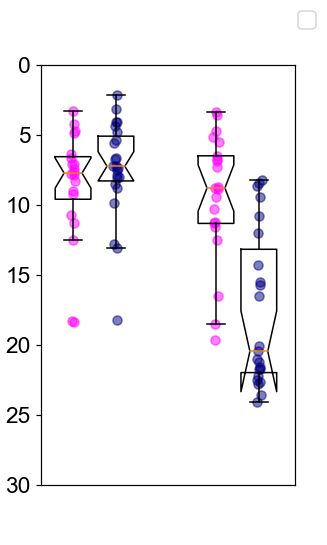

Or42bSF_EtB1:750_dst
-0.3
Or42bChrR_EtB1:750_dst
0.3
Or42bSF_EtB1:750_VR_dst
1.7
Or42bChrR_EtB1:750_VR_dst
2.3


In [18]:
# This is a nested list!
data_to_plot = [
    df_for_stats_10mM,
    df_for_stats_10mM_VR
    ]

labels_to_plot = [
    label_10mM,
    label_10mM_VR
]

color = ['magenta',
         'navy']

# Bonferroni corrected p-values
for current_dict in all_p_values:
    for current_key in current_dict:
        #print(current_group)
        print(current_key + ' Bonferroni corrected p-value: ' + repr(current_dict[current_key]*len(all_p_values)))

shared_functions.plot_DST_boxplot_grouped(data_to_plot, labels_to_plot, color, savepath,
                         'Fig3D_Or42bChR_EtB_Boxplots.svg', ylim=(0,30))

In [19]:
shared_functions.estimate_PDF(Or42bSF_EtB10mM_dst, Or42bSF_EtB10mM_fps, 'Or42bSF_EtB1:750dst',
                              Or42bChrR_EtB10mM_dst, Or42bChrR_EtB10mM_fps, 'Or42bChrR_EtB1:750_dst',
                              savename=Path(savepath, 'Fig3C_Or42bChr10mMEtB_hist.svg'),
                              color1='magenta',
                              color2='navy',
                              #color3='red',
                              ylim=(-0.01, 0.1),
                              second_linestyle='solid'
         )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


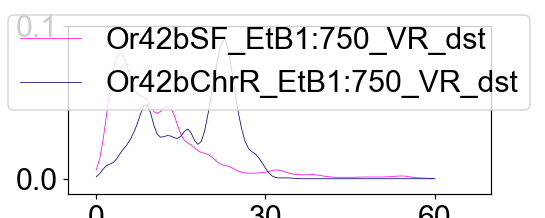

In [20]:
shared_functions.estimate_PDF(Or42bSF_EtB10mM_VR_dst, Or42bSF_EtB10mM_VR_fps, 'Or42bSF_EtB1:750_VR_dst',
                              Or42bChrR_EtB10mM_VR_dst, Or42bChrR_EtB10mM_VR_fps, 'Or42bChrR_EtB1:750_VR_dst',
                              savename=Path(savepath, 'Fig3C_Or42bChr10mMEtB_plus_VR_hist.svg'),
                              color1='magenta',
                              color2='navy',
                              #color3='red',
                              ylim=(-0.01, 0.1),
                              second_linestyle='solid'
         )

# Export stats

In [21]:
# Before calling export_statitics, make sure all names are properly renamed

corrected_group_names = []

for current_data in [df_for_stats_10mM, df_for_stats_10mM_VR]:
    labels = current_data.drop_duplicates(subset = ["Group"])['Group'] #extract unique group names
    print(labels)
    
    temp_data = current_data.replace(
        ['Or42bChrR_EtB10mM_dst', 'Or42bSF_EtB10mM_dst', 'Or42bChrR_EtB10mM_VR_dst', 'Or42bSF_EtB10mM_VR_dst'],
        ['Or42b>ChR SF, 1:750', 'Or42bSF, 1:750', 'Or42b>ChR SF, 1:750 + VR', 'Or42bSF, 1:750 + VR']
        )
    
    corrected_group_names.append(temp_data)
    
    new_labels = temp_data.drop_duplicates(subset = ["Group"])['Group'] #extract unique group names
    print(new_labels)
    
shared_functions.export_pairwise_test(corrected_group_names, savepath=savepath_for_stats,
                                      savename='Fig3c', parametric=False)

0     Or42bChrR_EtB1:750_dst
23      Or42bSF_EtB1:750_dst
Name: Group, dtype: object
0     Or42bChrR_EtB1:750_dst
23      Or42bSF_EtB1:750_dst
Name: Group, dtype: object
0     Or42bChrR_EtB1:750_VR_dst
23      Or42bSF_EtB1:750_VR_dst
Name: Group, dtype: object
0     Or42bChrR_EtB1:750_VR_dst
23      Or42bSF_EtB1:750_VR_dst
Name: Group, dtype: object
['Or42bChrR_EtB1:750_dst', 'Or42bSF_EtB1:750_dst']
['Or42bChrR_EtB1:750_VR_dst', 'Or42bSF_EtB1:750_VR_dst']
